<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_114/blob/main/Actividad_Semana4_Normalization_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de dato**
###Tecnológico de Monterrey

# **Actividad - Semana 4**
## **Normalización / PCA**


##Equipo 114:
###Alumnos:
####Javier Granados - A00566717
####Josías Ruiz - A00968460

#####Prof. Jobish Vallikavungal Devassia 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Objectives:

# PARTE1:
Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

##Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

##Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

##Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

# PARTE2

Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

# **Clean Data, Understand Data, Prepare data**
## Parte Parcial de Parte 3

In [ ]:
# Columns information: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt
# Read data from provided URL
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Check for data types integrity
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [ ]:
# Check for NaNs
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [ ]:
df.shape

(30000, 25)

In [ ]:
# Drop rows with NaN; 42 Rows out of 30K. 
df.dropna(inplace=True)

In [ ]:
df.shape

(29958, 25)

In [ ]:
# Check for NaNs
df.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

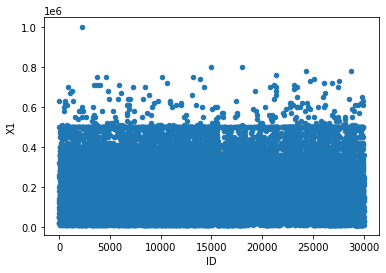

In [ ]:
# Validate data column by column
# X1 with one dubious outlier but acceptable
df[['ID','X1']].plot(kind='scatter', x='ID', y='X1')

In [ ]:
# Parameters in X2
print(df['X2'].unique())

[2. 1.]


Column 3 presents data invalid according to the description. Also since this column represents education the scale does not makes sense in proportion it is rather categorical only. For the sake of the model, we should put each category into a boolean state; however, it will be left as is. This is out of the scope of the exercise.

In [ ]:
# Parameters in X3
# Column 3 presents invalid data according to the description
df['X3'].value_counts()

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

In [ ]:
# Drop from column 3 values different from 1,2,3 and 4.
df.drop(df.index[df['X3'].isin([5,6,0])], inplace=True)

In [ ]:
# New X3 value count
print(df['X3'].value_counts())
print('New df shape:', df.shape)

2.0    14009
1.0    10572
3.0     4909
4.0      123
Name: X3, dtype: int64
New df shape: (29613, 25)


In [ ]:
# Parameters in X4
df['X4'].value_counts()

2.0    15781
1.0    13461
3.0      317
0.0       54
Name: X4, dtype: int64

In [ ]:
# Drop from column 4 values different from 1,2 and 3
df.drop(df.index[df['X4'].isin([0])], inplace=True)

In [ ]:
# New X4 value count
print(df['X3'].value_counts())
print('New df shape:', df.shape)

2.0    14003
1.0    10568
3.0     4865
4.0      123
Name: X3, dtype: int64
New df shape: (29559, 25)


In [ ]:
# Parameters in X5
# Data seems to be in order
df['X5'].describe()

count    29559.000000
mean        35.461957
std          9.209596
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

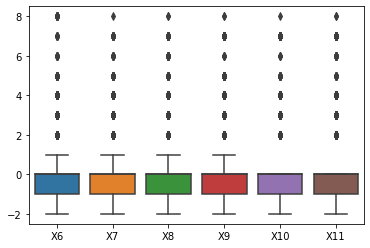

In [ ]:
# Payment status range check. X6 to X11. Valid range from -1 to 8. 
paymentStatusColumns = ['X'+str(x) for x in range(6,12)]
sns.boxplot(data = df[paymentStatusColumns])

# Assumption:
## -2 is full payment

In [ ]:
df[paymentStatusColumns].describe()

,X6,X7,X8,X9,X10,X11
count,29559.000000,29559.000000,29559.000000,29559.000000,29559.000000,29559.000000
mean,-0.015359,-0.131567,-0.164011,-0.218749,-0.264589,-0.288034
std,1.124694,1.199631,1.198947,1.171497,1.135332,1.151517
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


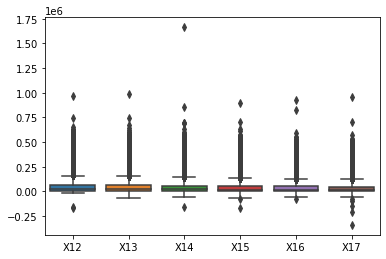

In [ ]:
# Amount of bill statement columns. X12 to X17
# There seems to be an outlier but will be considered as acceptable.
billStatementColumns = ['X'+str(x) for x in range(12,18)]
sns.boxplot(data = df[billStatementColumns])

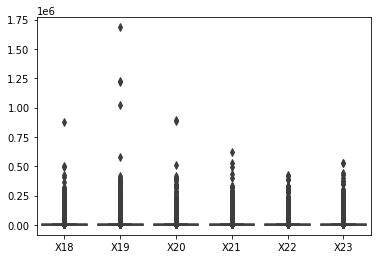

In [ ]:
# Amount of previous payment columns. X18 to X23.
# There seems to be an outlier but will be considered as acceptable.
prevPaymentColumns = ['X'+str(x) for x in range(18,24)]
sns.boxplot(data = df[prevPaymentColumns])

# **Modelado** 

## We model PCA without Y (target) since we account for a variance only for input parameters.

In [ ]:
# Define PCA
PCs = PCA()
# Scale using PCA
scaler = preprocessing.StandardScaler().fit(df.iloc[:,1:-1])
scaled_df = pd.DataFrame(scaler.transform(df.iloc[:,1:-1]))
PCs.fit(scaled_df)
#PCs.fit(preprocessing.scale(df.iloc[:,1:-1]))

PCA()

In [ ]:
scaled_df = preprocessing.scale(df.iloc[:,1:-1])
scaled_df = pd.DataFrame(scaled_df, columns=df.iloc[:,1:-1].columns)
scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136161,0.810605,0.259872,-1.071939,-1.244588,1.791947,1.776883,-0.697281,-0.666894,-1.528575,...,-0.667064,-0.671659,-0.662848,-0.652865,-0.340939,-0.225516,-0.295670,-0.307392,-0.314541,-0.293547
1,-0.366525,0.810605,0.259872,0.858335,-1.027419,-0.875489,1.776883,0.136798,0.186729,0.233054,...,-0.638246,-0.620715,-0.605955,-0.598103,-0.340939,-0.212055,-0.238823,-0.243783,-0.314541,-0.180352
2,-0.597416,0.810605,0.259872,0.858335,-0.158746,0.013656,0.109675,0.136798,0.186729,0.233054,...,-0.480970,-0.448530,-0.416700,-0.391748,-0.249348,-0.190414,-0.238823,-0.243783,-0.248973,-0.010559
3,-0.905270,0.810605,0.259872,-1.071939,0.167007,0.013656,0.109675,0.136798,0.186729,0.233054,...,0.035695,-0.230820,-0.185982,-0.156678,-0.220265,-0.167951,-0.227454,-0.237422,-0.244448,-0.236949
4,-0.905270,-1.233647,0.259872,-1.071939,2.338692,-0.875489,0.109675,-0.697281,0.186729,0.233054,...,-0.158872,-0.345630,-0.347572,-0.331595,-0.220265,1.332298,0.272799,0.265090,-0.269364,-0.255117


In [ ]:
scaled_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,...,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04,2.955900e+04
mean,-8.653723e-18,1.230752e-16,-7.884503e-17,1.048062e-16,1.538440e-17,-3.846099e-18,6.057606e-17,-1.442287e-17,-6.826826e-17,4.230709e-17,...,-2.596117e-17,6.922978e-17,1.057677e-17,-5.288386e-17,-1.634592e-17,1.490363e-17,-3.846099e-18,4.927814e-18,-1.923049e-17,9.615247e-19
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213125e+00,-1.233647e+00,-1.147782e+00,-1.071939e+00,-1.570340e+00,-1.764634e+00,-1.557533e+00,-1.531360e+00,-1.520517e+00,-1.528575e+00,...,-2.950977e+00,-3.318502e+00,-2.002171e+00,-6.355876e+00,-3.409389e-01,-2.553377e-01,-2.956698e-01,-3.073919e-01,-3.145409e-01,-2.935471e-01
25%,-9.052702e-01,-1.233647e+00,-1.147782e+00,-1.071939e+00,-8.102509e-01,-8.754889e-01,-7.239288e-01,-6.972810e-01,-6.668938e-01,-6.477602e-01,...,-6.386797e-01,-6.353974e-01,-6.335619e-01,-6.314037e-01,-2.806020e-01,-2.195433e-01,-2.734996e-01,-2.884046e-01,-2.975587e-01,-2.857367e-01
50%,-2.125979e-01,8.106050e-01,2.598724e-01,8.583352e-01,-1.587455e-01,1.365648e-02,1.096751e-01,1.367981e-01,1.867291e-01,2.330542e-01,...,-3.873599e-01,-3.758355e-01,-3.649448e-01,-3.655007e-01,-2.142315e-01,-1.684703e-01,-1.933455e-01,-2.119782e-01,-2.161884e-01,-2.086506e-01
75%,5.570379e-01,8.106050e-01,2.598724e-01,8.583352e-01,6.013441e-01,1.365648e-02,1.096751e-01,1.367981e-01,1.867291e-01,2.330542e-01,...,1.882925e-01,1.734233e-01,1.619894e-01,1.725777e-01,-3.895279e-02,-3.892651e-02,-3.985891e-02,-5.193757e-02,-4.862865e-02,-6.715624e-02
max,6.406270e+00,8.106050e-01,3.075181e+00,2.788610e+00,4.727545e+00,7.126820e+00,6.778506e+00,6.809431e+00,7.015713e+00,7.279569e+00,...,2.338479e+01,1.321003e+01,1.460483e+01,1.549652e+01,5.236647e+01,7.264317e+01,5.064140e+01,3.919389e+01,2.765224e+01,2.962775e+01


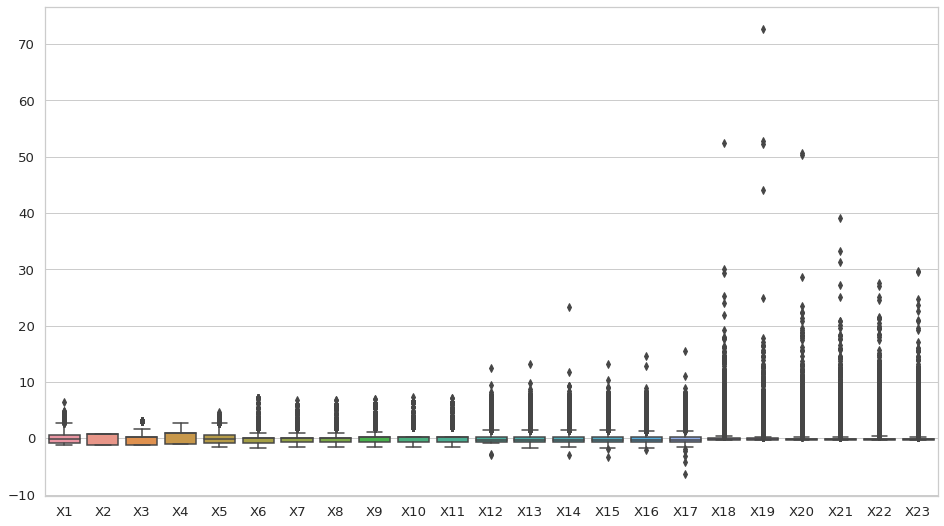

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data=scaled_df, ax=ax)

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(PCs.explained_variance_),
                             'Proportion of variance': PCs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(PCs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5583,2.0285,1.2484,1.2169,1.0116,0.9763,0.9493,0.9425,0.9322,0.8839,...,0.7183,0.6357,0.5097,0.4966,0.4347,0.3630,0.2635,0.2006,0.1574,0.1525
Proportion of variance,0.2845,0.1789,0.0678,0.0644,0.0445,0.0414,0.0392,0.0386,0.0378,0.0340,...,0.0224,0.0176,0.0113,0.0107,0.0082,0.0057,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4634,0.5312,0.5956,0.6401,0.6815,0.7207,0.7593,0.7971,0.8311,...,0.9396,0.9572,0.9685,0.9792,0.9874,0.9931,0.9962,0.9979,0.9990,1.0000


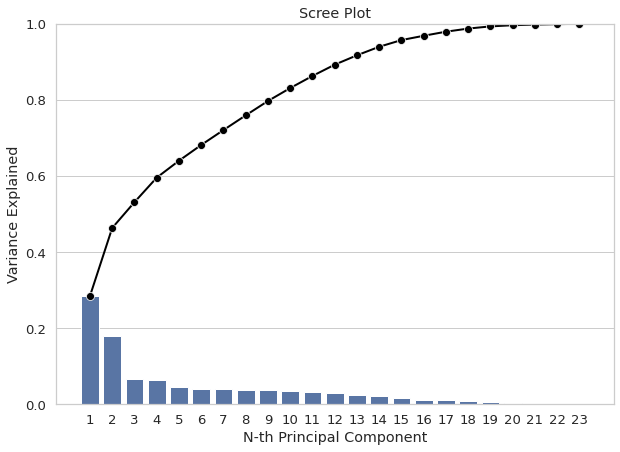

In [ ]:
# Visualize the components variance
PC_components = np.arange(PCs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = PCs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(PCs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pcsComponents_df = pd.DataFrame(PCs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df.iloc[:, 1:-1].columns
                                )
pcsComponents_df.iloc[:,:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
X1,0.067914,0.316586,0.009602,0.070746,-0.136889,-0.375188,-0.162583,-0.000444,0.067583,0.000507,...,-0.738646,-0.025596,0.041471,-0.019259,0.006901,0.006251,-0.009804,0.014844,-0.000660,0.002570
X2,-0.021960,0.030244,0.030847,-0.074562,0.902154,-0.350310,-0.081585,-0.005748,0.035026,0.026914,...,0.116579,0.025740,0.000017,0.020361,-0.003327,-0.001742,0.001741,-0.000507,-0.000833,0.000703
X3,0.017220,-0.112654,-0.335652,0.230018,0.325598,0.509358,0.436794,-0.026376,-0.234478,0.083261,...,-0.396494,-0.037117,0.006065,-0.026514,0.003239,0.000467,-0.005245,0.000024,0.003045,0.001029
X4,-0.006114,-0.041248,0.485558,-0.402931,-0.063247,0.263074,0.181662,-0.013691,-0.093495,0.047410,...,0.137390,0.005606,0.005347,-0.010975,-0.006078,-0.000962,-0.003132,-0.000151,0.000573,-0.001728
X5,0.013746,0.063748,-0.498700,0.424119,-0.152949,-0.075956,-0.086268,-0.000751,0.056195,0.008508,...,0.449799,0.025277,0.002044,-0.000912,-0.005405,-0.005283,-0.000350,-0.001433,-0.000295,0.000110
X6,0.160961,-0.297720,-0.016126,0.012994,-0.035017,-0.053096,0.079795,0.012320,-0.035319,0.012780,...,-0.080768,-0.609691,-0.239927,0.016708,0.134618,-0.032442,-0.005874,-0.000918,-0.002301,0.000608
X7,0.193963,-0.334002,0.016935,0.049261,-0.038317,-0.075300,0.081582,0.007324,-0.037465,0.013177,...,-0.077050,0.323825,0.556032,-0.071392,-0.485972,0.138866,-0.030371,0.012497,0.002426,-0.000393
X8,0.200263,-0.342865,0.058480,0.086346,-0.024140,-0.077113,0.004979,-0.021087,-0.010239,-0.023116,...,-0.080513,0.540952,-0.110025,-0.158743,0.605716,-0.305735,0.025814,-0.027862,-0.008525,-0.003914
X9,0.207022,-0.343596,0.083920,0.113028,-0.008211,-0.089767,-0.058235,-0.042941,0.053150,-0.064853,...,-0.056926,0.169465,-0.584964,0.086042,-0.226143,0.567626,0.021122,0.002099,0.013803,-0.002546
X10,0.210893,-0.330466,0.103423,0.120597,0.002073,-0.082088,-0.119104,-0.011454,0.076962,0.054901,...,-0.017878,-0.178517,-0.075683,0.148250,-0.383880,-0.674748,0.023887,0.023668,-0.009413,-0.000076


# **Answer Step1|Paso1 and Step2|Paso2:**
# **We account for over 95% of the variance of the data with more than 15 components.**
# Since PCA is a transformation of information to keep variance we can say that the components are new vectors that keep information from the original set of data. Having said that, the most significant parameters of the component are depicted in the next cell, however, they are a combination of all others. 

In [ ]:
for pc in pcsComponents_df.columns: 
  print(f'Principa Component {pc} ist most affected by {(pcsComponents_df[pc]).idxmax()}')


Principa Component PC1 ist most affected by X15
Principa Component PC2 ist most affected by X1
Principa Component PC3 ist most affected by X4
Principa Component PC4 ist most affected by X5
Principa Component PC5 ist most affected by X2
Principa Component PC6 ist most affected by X3
Principa Component PC7 ist most affected by X22
Principa Component PC8 ist most affected by X21
Principa Component PC9 ist most affected by X22
Principa Component PC10 ist most affected by X20
Principa Component PC11 ist most affected by X19
Principa Component PC12 ist most affected by X6
Principa Component PC13 ist most affected by X4
Principa Component PC14 ist most affected by X5
Principa Component PC15 ist most affected by X8
Principa Component PC16 ist most affected by X7
Principa Component PC17 ist most affected by X12
Principa Component PC18 ist most affected by X8
Principa Component PC19 ist most affected by X9
Principa Component PC20 ist most affected by X17
Principa Component PC21 ist most affected

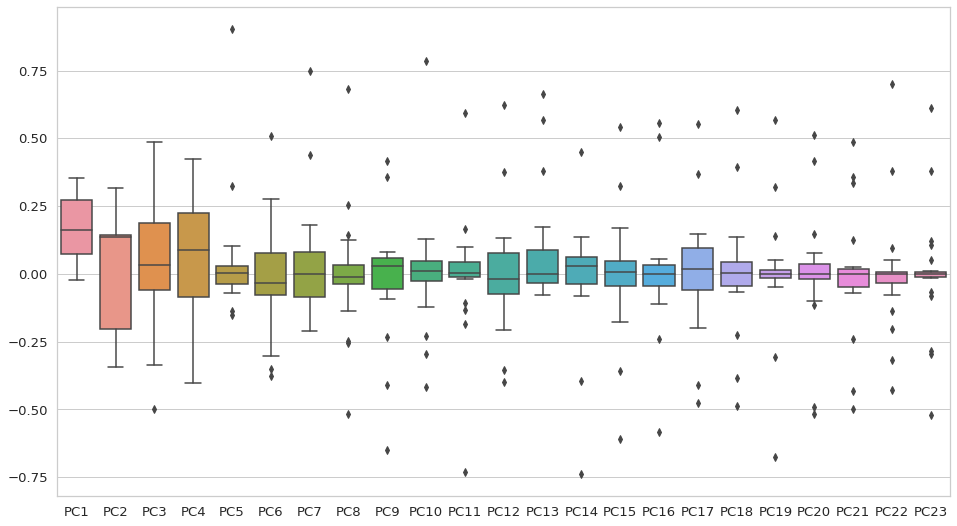

In [ ]:
# Plot of components variance impact on each
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data=pcsComponents_df, ax=ax)

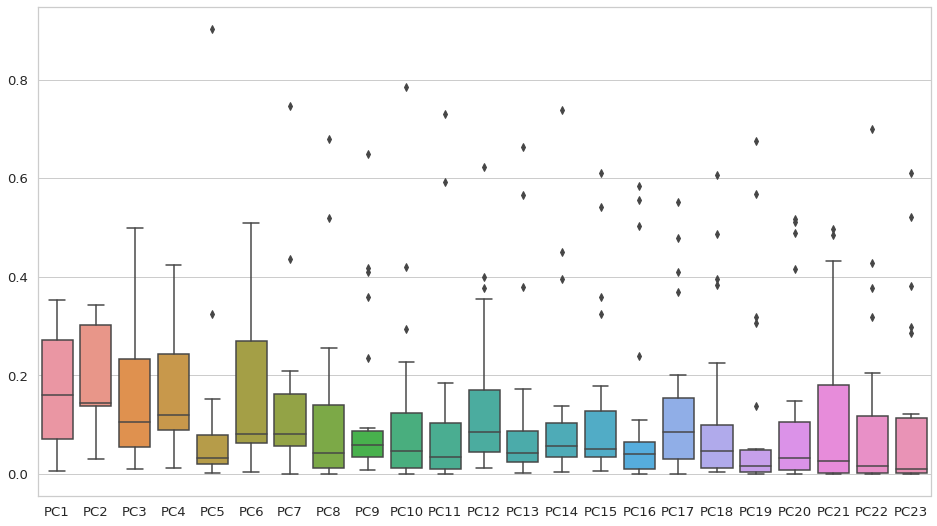

In [ ]:
# Plot of components absolute variance impact on each PC
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data=abs(pcsComponents_df), ax=ax)

# **Answer Step3|Paso3**

# In the clean data process the data is conditioned to be consistent. We have accepted outliers since we have no reason to discard them other than that it might be at the end of the distribution. 

# The plot above shows the component variance from the original table. As expected, the variance decreases along with the importance of each component. This is because the components account for variation from the original values; hence a new vector represents the variation from their most significant variables.

# **Parte 2**

¿Cuál es el número de componentes mínimo y por qué?
Depende de nuestro objetivo. Si consideramos que queremos una representación de la información con PCA, con al menos 15 componentes (de las 23 variables existentes) obtenemos una representación fiel de > 95% de la información.

¿Cuál es la variación de los datos que representan esos componentes?
Es mayor a 95%

¿Cuál es la pérdida de información después de realizar PCA?
depende de cuál sea nuestro objetivo para representar la información original. Cada componente representa una variación, si acumulamos las de mayor magnitud podems llegar a 95% de representación/varianza con 15 componentes. 

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
Según PCA, las variables con mayor importancia son X1 y X15. Ambas son las principales representaciones de PC2 y PC1 respectivamente. Ambas representan la información original en 46.34% 

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
Ayuda a reducir la cantidad de información relevante para plantear un nuevo modelo. Lo que se traduce en eficientar recursos de memoria y procesamiento. 

# **Next Step**

The scaler was configured with the whole data set. Which scales all the data ranges combined. The peferred methoudl would have been to scale each one of the columns separately so the magnitude of other would not interfere. Hence, I would dare to presume that the most significant variable would not be X15 but rather X1, X4 and X5 respectively.